In [1]:
#reading the excel workbook and getting the size of the dataset
import pandas as pd
df = pd.read_csv('updated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2442 non-null   int64  
 1   ID                           2442 non-null   object 
 2   Delivery_person_ID           2442 non-null   object 
 3   Delivery_person_Age          2442 non-null   int64  
 4   Delivery_person_Ratings      2348 non-null   float64
 5   Restaurant_latitude          2442 non-null   float64
 6   Restaurant_longitude         2442 non-null   float64
 7   Delivery_location_latitude   2442 non-null   float64
 8   Delivery_location_longitude  2442 non-null   float64
 9   Time_Orderd                  2353 non-null   object 
 10  Time_Order_picked            2442 non-null   object 
 11  Weatherconditions            2442 non-null   int64  
 12  Road_traffic_density         2442 non-null   int64  
 13  Vehicle_condition 

In [2]:
#exploring nulls: finding out how many nulls every dataset has
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings        94
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Time_Orderd                    89
Time_Order_picked               0
Weatherconditions               0
Road_traffic_density            0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
multiple_deliveries            54
Festival                        0
City                            0
Time_taken(min)                 0
dtype: int64

In [3]:
#creating another dataframe where null values from numeric columns are replaced with 0 and null values from time_ordered values are replaced with 'no_record'
df2 = df.fillna({'Delivery_person_Ratings':'0','Time_Orderd':'no_record','multiple_deliveries':'0'})
df2.isnull().sum()

Unnamed: 0                     0
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [4]:
#calculating skewness of every int and float numeric column and visualizing a few 
import seaborn as sns
df2.skew(axis=0,skipna=True)

/var/folders/vl/w9bp1_814g15jryp51vy36z80000gn/T/ipykernel_91321/1998871299.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.skew(axis=0,skipna=True)


Unnamed: 0                     0.000000
Delivery_person_Age           -1.450081
Delivery_person_Ratings       -4.034347
Restaurant_latitude           -1.420103
Restaurant_longitude          -3.376322
Delivery_location_latitude    -0.678329
Delivery_location_longitude   -3.140733
Weatherconditions              0.373912
Road_traffic_density           0.216805
Vehicle_condition              0.104407
Type_of_order                  0.007667
Type_of_vehicle               -0.203215
multiple_deliveries            0.241406
Festival                       7.568629
City                           1.210822
Time_taken(min)                0.535215
dtype: float64

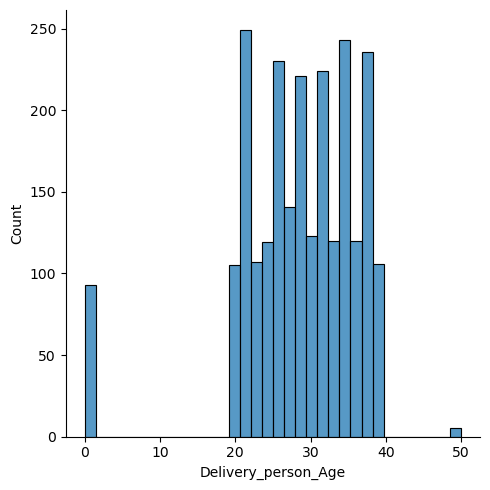

In [5]:
#visualizing the distribution of skewed variables: Delivery_person_Age
sns.displot(df.Delivery_person_Age)

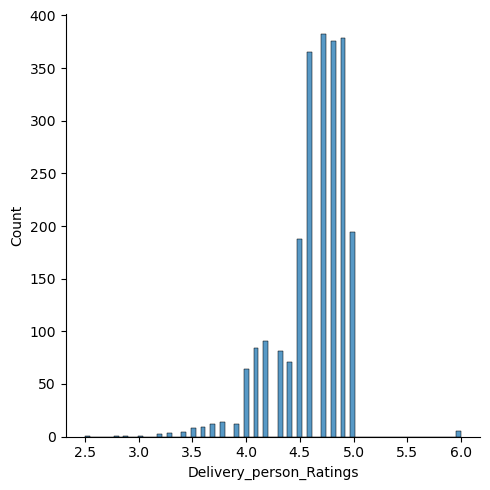

In [6]:
#visualizing the distribution of skewed variables: Delivery_person_Ratings
sns.displot(df.Delivery_person_Ratings)

In [7]:
#using .describe() to quickly assess which variables have outliers
df.describe()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,2442.000000,2442.000000,2348.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2388.000000,2442.000000,2442.000000,2442.000000
mean,1221.500000,28.404996,4.630111,17.153256,71.030894,17.579366,71.479728,2.694922,1.742424,0.993857,1.497952,3.253481,0.762563,1.027846,1.540131,26.487715
std,705.089001,8.026137,0.315338,8.007773,21.512859,7.183449,20.199970,2.011206,1.004493,0.835241,1.127746,0.592903,0.557680,0.189985,0.925440,9.339518
min,1.000000,0.000000,2.500000,-30.902872,-85.335486,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
25%,611.250000,24.000000,4.500000,12.933284,73.170937,12.990346,73.415482,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,20.000000
50%,1221.500000,29.000000,4.700000,18.562450,76.282198,18.663646,76.334069,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,26.000000
75%,1831.750000,34.000000,4.800000,22.728163,78.053957,22.783839,78.127778,4.000000,2.000000,2.000000,3.000000,4.000000,1.000000,1.000000,3.000000,32.000000
max,2442.000000,50.000000,6.000000,30.914057,88.433452,31.035562,88.503310,7.000000,5.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,54.000000


/var/folders/vl/w9bp1_814g15jryp51vy36z80000gn/T/ipykernel_91321/404849871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

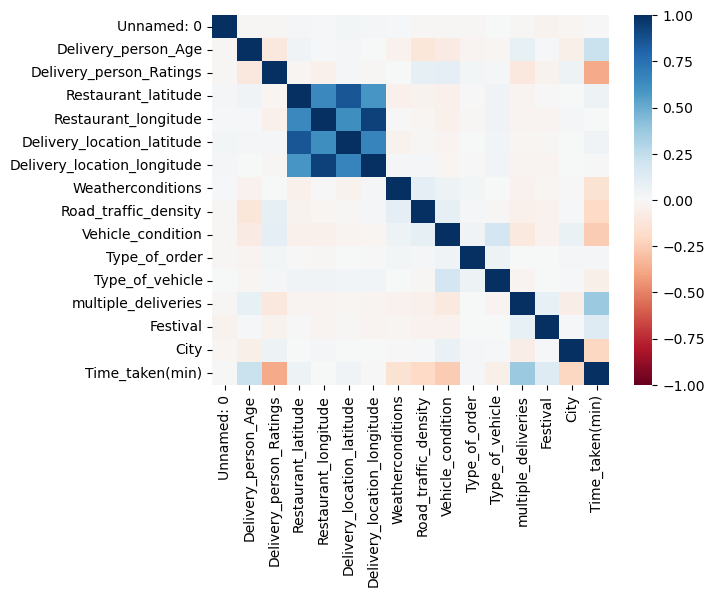

In [8]:
#using a correlation heatmap to describe the relationship between the variables
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)

In [9]:
#using a correlation matrix to describe the relationship between the variables
corr

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
Unnamed: 0,1.000000,-0.010761,-0.013881,0.018682,0.011883,0.025820,0.018875,0.014780,-0.008456,-0.011132,-0.012750,0.000732,-0.009177,-0.033414,-0.020059,-0.003595
Delivery_person_Age,-0.010761,1.000000,-0.102550,0.045166,0.008814,0.020074,0.002421,-0.042821,-0.123998,-0.085061,-0.024371,-0.021237,0.080651,0.010870,-0.061618,0.223626
Delivery_person_Ratings,-0.013881,-0.102550,1.000000,-0.019395,-0.054274,0.019931,-0.012395,0.000996,0.086514,0.100881,0.028105,0.021147,-0.104405,-0.031687,0.051329,-0.381264
Restaurant_latitude,0.018682,0.045166,-0.019395,1.000000,0.640673,0.858166,0.589468,-0.049336,-0.036112,-0.050388,-0.007324,0.044901,-0.023845,-0.007247,0.003446,0.047759
Restaurant_longitude,0.011883,0.008814,-0.054274,0.640673,1.000000,0.619783,0.932664,-0.000707,-0.018526,-0.053893,-0.014728,0.045077,-0.026144,-0.025887,0.015777,0.001534
Delivery_location_latitude,0.025820,0.020074,0.019931,0.858166,0.619783,1.000000,0.671872,-0.032750,-0.008235,-0.025563,0.004165,0.031422,-0.021173,-0.015326,0.001383,0.041238
Delivery_location_longitude,0.018875,0.002421,-0.012395,0.589468,0.932664,0.671872,1.000000,0.021749,0.020673,-0.022533,-0.004158,0.033358,-0.025230,-0.030312,0.005621,-0.003217
Weatherconditions,0.014780,-0.042821,0.000996,-0.049336,-0.000707,-0.032750,0.021749,1.000000,0.095329,0.050097,0.027269,0.003725,-0.039331,-0.022788,-0.005855,-0.147579
Road_traffic_density,-0.008456,-0.123998,0.086514,-0.036112,-0.018526,-0.008235,0.020673,0.095329,1.000000,0.088446,0.021775,-0.009328,-0.053849,-0.046121,0.015311,-0.198480
Vehicle_condition,-0.011132,-0.085061,0.100881,-0.050388,-0.053893,-0.025563,-0.022533,0.050097,0.088446,1.000000,0.041521,0.183486,-0.100288,-0.042810,0.062594,-0.252168


In [10]:
#turning dataframe into an excel spreadsheet for Tableau public visualization 
df.to_excel('df.xlsx',index=False)